<a href="https://colab.research.google.com/github/slava445/collab/blob/main/Chollet_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Chollet_2_1 + numpy tutorial![matrix.png](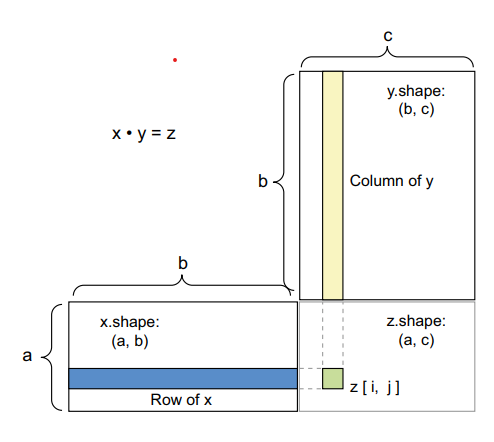![matrix.png](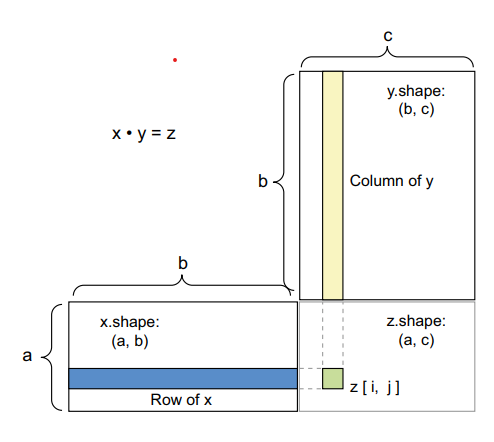![S29.gif](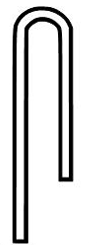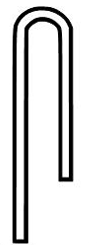)))

In [ ]:
!pip install tensorflow
!pip install mnist

#### write digit recognition example ####

In [ ]:
import tensorflow
import mnist # test set of handwritten digits
test_images = mnist.test_images()
test_labels = mnist.test_labels()
train_images =  mnist.train_images()
train_labels = mnist.train_labels()
print(f'test_images.shape={test_images.shape}')
print(f'test_images lenght={len(test_images)}')
print(f'train_images.shape={train_images.shape}')
print(f'train_images lenght={len(train_images)}')
print(f'test_labels.shape={test_labels.shape}')
print(f'test_labels lenght={len(test_labels)}')
print(f'train_labels.shape={train_labels.shape}')
print(f'train_labels lenght={len(train_labels)}')
from tensorflow import keras
from keras import layers

# create model consisting two layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# configure model for training
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

# reshape sets for model
train_images = train_images.reshape((60000, 28 * 28))
print(f'train_images.reshape{train_images.shape}')

# int to float (  0 <= 1) transformatin
train_images = train_images.astype("float32") / 255
print(f'train_images[0][0] = {train_images[0][0]}')
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

# model training
model.fit(train_images, train_labels, epochs=5, batch_size=128)

# some prediction on the part of test images
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
for i in range(10):
  print(f'Probabily for the digit {test_labels[i]} is {predictions[i][test_labels[i]]}')

# loss and accuracy for all test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Loss : {test_loss}, accuracy: {test_acc}')


In [ ]:
!pip install numpy

#### scalar, vector, tensor, rank ####

In [16]:
import numpy as np
print(np.__version__) # 1.23.5

# scalar
x = np.array(12) # 0D array - scalar
print(x, x.ndim, x.dtype, x.nbytes) # 12 0 int64 8

# vector
x = np.array([i for i in range(10)]) # 1D array - 10D vector - 1 rank vector
print(x, x.ndim, x.dtype, type(x)) # [0 1 2 3 4 5 6 7 8 9] 1 int64 <class 'numpy.ndarray'>
print(x[4]) # 4
print(x[1:8:3]) # [1, 4, 7]

# 2D array - rank 2 tensor
x = np.array([[i for i in range(3)], [i for i in range(3, 6)]])
print(x, x.ndim, x.shape)
print(x[1,2]) # 5
# [[0 1 2]
#  [3 4 5]]
# 2
# (2, 3)
x = np.array([[1,2,3],[4,5,6], [7,8,9]])
print(x, x.ndim, x.shape, sep='\n')
print(x[1,0]) # 4
# [[1 2 3]
# [4 5 6]
# [7 8 9]]
# dimention = 2
# shape = (3, 3)

# rank 3 tensor
x = np.array([
    [
        [1, 2, 3 ],[4, 5, 6 ],[7, 8, 9 ]
    ],
    [
        [10,11,12],[13,14,15],[16,17,18]
    ],
    [
        [19,20,21],[22,23,24],[25,26,27]
    ]
            ])
print(x, x.ndim, x.shape, sep='\n')
print(x[1,0,-2]) # 11
#[[[ 1  2  3]
#  [ 4  5  6]
#  [ 7  8  9]]

# [[10 11 12]
#  [13 14 15]
#  [16 17 18]]

# [[19 20 21]
#  [22 23 24]
#  [25 26 27]]]
# Dimension 3
# Shape(3, 3, 3)


1.23.5
12 0 int64 8
[0 1 2 3 4 5 6 7 8 9] 1 int64 <class 'numpy.ndarray'>
4
[1 4 7]
[[0 1 2]
 [3 4 5]] 2 (2, 3)
5
[[1 2 3]
 [4 5 6]
 [7 8 9]]
2
(3, 3)
4
[[[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]]

 [[10 11 12]
  [13 14 15]
  [16 17 18]]

 [[19 20 21]
  [22 23 24]
  [25 26 27]]]
3
(3, 3, 3)
11


*numpy types*

    i - integer
    b - boolean
    u - unsigned integer
    f - float
    c - complex float
    m - timedelta
    M - datetime
    O - object
    S - string
    U - unicode string
    V - fixed chunk of memory for other type ( void )
    i, u, f, S and U we can define size as well


#### type transform, copy, view, shape, reshape ####


In [17]:
import numpy as np

x = np.array(['peach', 'banana', 'apple']) # <U6 unicode string

# automatic types transformation
x = np.array([1,2,3], dtype='S') # |S1 string [b'1' b'2' b'3'] byte array
x = np.array([1,2,3], dtype = 'i4') # int32 (4 - bytes)

# type transformation
x = np.array([4.1, 5.2, 6.3])
x = x.astype(int)*2 # [8 10 12] int64

# an independent copy of array
new_arr = x.copy()

# a link to existed array
link = x.view()
print(new_arr.base) # None
print(link.base) # link to original

# shape
arr = np.array([1,2,3,4,5], ndmin=4) # [[[[1 2 3 4 5]]]] (1, 1, 1, 5)

# reshape
arr = np.array([1,2,3,4,5,6,7,8,9,10,11,12])

# dimension will have 2 arrays that contains 3 arrays, each with 2 elements
arr = arr.reshape(2,3,2)
#[[[ 1  2]
#  [ 3  4]
#  [ 5  6]]

# [[ 7  8]
#  [ 9 10]
#  [11 12]]]

# you can use -1 for automatic count dimension
arr = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
arr = arr.reshape(2,3,-1) # (2,3,2)

# convert into 1D array
arr = arr.reshape(-1)



None
[ 8 10 12]


#### iterations *nditer(arr)*, indexations and filters ####
#### get indexs during indexations *ndenumerate(arr)* ####

#### *concatination(), stack(), vstack(), hstack(),dstack() *####


In [18]:
# iterablity
arr = np.array([[[1,2],[3,4]],[[5,6],[7,8]]])
for x in arr:
  for x1 in x:
    for x2 in x1:
        print(x2)

# best way iterations
for x in np.nditer(arr):
  print(x)

# iterations with type converting - need some buffer
for x in np.nditer(arr, flags=['buffered'], op_dtypes=['S']):
  print(x, x.dtype) # b'1', |S21

# filtering and followed by iteration - each second
arr = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
for x in np.nditer(arr[:, ::2]):
  print(x)

# Sometimes we require corresponding index of the element while iterating
for idx, x in np.ndenumerate(arr): # return enumerator
  print(idx, x)

# pass a sequence of arrays that we want to join to the concatenate() function,
# along with the axis. If axis is not explicitly passed, it is taken as 0.
arr1 = np.array([1,2,3,4])
arr2 = np.array([5,6,7,8])
arr = np.concatenate((arr1, arr2))
print(arr)

# Join two 2-D arrays along rows (axis=1):
arr1 = np.array([[1, 2], [3, 4]])
arr2 = np.array([[5, 6], [7, 8]])
arr = np.concatenate((arr1, arr2), axis=1)
print(arr)
# [[1 2 5 6]
#  [3 4 7 8]]

# Stacking is same as concatenation,
# the only difference is that stacking is done along a new axis. (default 0)
arr1 = np.array([1,2,3,4])
arr2 = np.array([5,6,7,8])
arr = np.stack((arr1, arr2), axis = 1)
print(arr)
# [[1 5]
# [2 6]
# [3 7]
# [4 8]]

# hstack() to stack along rows
arr = np.hstack((arr1, arr2))
print(arr)
# [1 2 3 4 5 6 7 8]

# vstack()  to stack along columns.
arr = np.vstack((arr1, arr2))
print(arr)
# [[1 2 3 4]
#  [5 6 7 8]]

# dstack() to stack along height, which is the same as depth.
arr = np.dstack((arr1, arr2))
print(arr)
# [[[1 5]
#  [2 6]
#  [3 7]
#  [4 8]]]


1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
b'1' |S21
b'2' |S21
b'3' |S21
b'4' |S21
b'5' |S21
b'6' |S21
b'7' |S21
b'8' |S21
1
3
5
7
(0, 0) 1
(0, 1) 2
(0, 2) 3
(0, 3) 4
(1, 0) 5
(1, 1) 6
(1, 2) 7
(1, 3) 8
[1 2 3 4 5 6 7 8]
[[1 2 5 6]
 [3 4 7 8]]
[[1 5]
 [2 6]
 [3 7]
 [4 8]]
[1 2 3 4 5 6 7 8]
[[1 2 3 4]
 [5 6 7 8]]
[[[1 5]
  [2 6]
  [3 7]
  [4 8]]]


#### Split array *array_split()* ####


In [25]:
import numpy as np
# Split the 1-D array into three 1-D arrays.
arr = np.array([1,2,3,4,5,6,7,8,9])
arr_split = np.array_split(arr, 3)
# automatic lenght adjusting
arr_split1 = np.array_split(arr, 4)
print(arr_split)  # [array([1, 2, 3]), array([4, 5, 6]), array([7, 8, 9])]
print(arr_split1) # [array([1, 2, 3]), array([4, 5]), array([6, 7]), array([8, 9])]

# Split the 2-D array into three 2-D arrays.
arr = np.array([[1,2],[3,4],[5,6],[7,8],[9,10],[11,12]])
arr_split = np.array_split(arr, 3)
print (arr_split)
# [array([[1, 2], [3, 4]]),
#  array([[5, 6], [7, 8]]),
#  array([[ 9, 10],[11, 12]])]

# default axis is 0 (columns), you can assign any axis
arr = np.array([[1,2,3],[4,5,6],[7,8,9],[10, 11, 12],[13,14,15],[16,17,18]])
arr_split = np.array_split(arr, 3, axis = 1)
# An alternate solution is using hsplit(arr, 3)
print(arr_split)
# [array([[ 1],
#         [ 4],
#         [ 7],
#         [10],
#         [13],
#         [16]]),
#  array([[ 2],
#         [ 5],
#         [ 8],
#         [11],
#         [14],
#         [17]]),
#  array([[ 3],
#         [ 6],
#         [ 9],
#         [12],
#         [15],
#         [18]])]

# An alternate solution is using hsplit() (opposite of hstack())
# Similar alternates to vstack() and dstack() are available as vsplit() and dsplit().


[array([1, 2, 3]), array([4, 5, 6]), array([7, 8, 9])]
[array([1, 2, 3]), array([4, 5]), array([6, 7]), array([8, 9])]
[array([[1, 2],
       [3, 4]]), array([[5, 6],
       [7, 8]]), array([[ 9, 10],
       [11, 12]])]
[array([[ 1],
       [ 4],
       [ 7],
       [10],
       [13],
       [16]]), array([[ 2],
       [ 5],
       [ 8],
       [11],
       [14],
       [17]]), array([[ 3],
       [ 6],
       [ 9],
       [12],
       [15],
       [18]])]


#### search in array *where(), searchsorted()* functons ####


In [26]:
import numpy as np
arr = np.array([1,2,3,4,5,4,5,6,4])
arr_search = np.where(arr == 4) #  (array([3, 5, 8]),)
arr_search = np.where(arr%2 == 0)# (array([1, 3, 5, 7, 8]),)
arr_search = np.where(arr%2 == 1)# (array([0, 2, 4, 6]),)

# binary search in sorted arrays, return index
arr = np.array([4,5,6,7,8,9,10])
ind = np.searchsorted(arr, 5 ) # 1  (index of 5)
# index of next from right
ind1 = np.searchsorted(arr,  5, side='right') # 2 (index of 6)
# Find the indexes where the values 2, 4, and 6 should be inserted:
arr = np.array([1,3,5,7])
ind = np.searchsorted(arr, [2,4,6]) # [1 2 3]
print(ind)


[1 2 3]


#### sorting array *sort()* ####



In [27]:
import numpy as np
arr = np.array([2,5,1,3,9,0,-1]) # [-1  0  1  2  3  5  9]
arr = np.array(['flag', 'ussr', 'abba']) # ['abba' 'flag' 'ussr']
arr = np.array([False, True, False, False]) # [False False False  True]
arr = np.array([[4,1,3],[7,-1, 2]])
# [[ 1  3  4]
#  [-1  2  7]]
arr1 = np.sort(arr)
print (arr1)

[[ 1  3  4]
 [-1  2  7]]


#### filtering array *x = [False, True, False, True]* ####

In [28]:
import numpy as np
arr = np.array([42, 43,44, 45])
x = [False, True, False, True]
arr1 = arr[x] # [43 45]
# creating filtering array
filter_arr = []
for a in arr:
  if a > 43:
    filter_arr.append(True)
  else :
    filter_arr.append(False)
arr1 = arr[filter_arr]  # [44 45]
# Creating Filter Directly From Array
filter_arr = arr%2 != 0 # odd elements
arr1=arr[filter_arr] # [43,45]

print(arr1)

[43 45]


MNIST dataset plot

(10000, 28, 28) 3 uint8
3


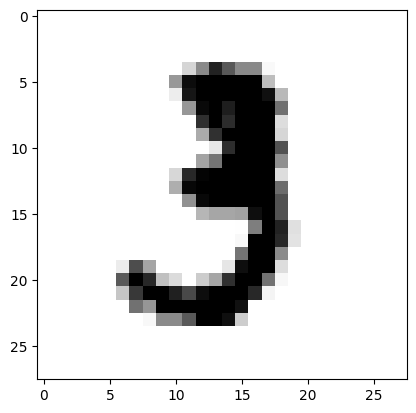

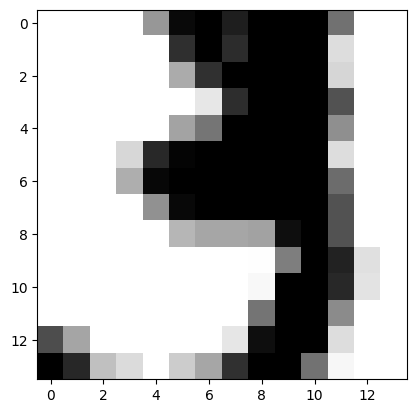

In [29]:
import mnist
test_images = mnist.test_images()
train_images = mnist.train_images()
test_labels = mnist.test_labels()
train_labels = mnist.train_labels()
print(test_images.shape, test_images.ndim, test_images.dtype)
import matplotlib.pyplot as plt
digit = train_images[10]
plt.imshow(digit, cmap=plt.cm.binary)
print(train_labels[10])
plt.show()
# slicing
digit = train_images[10, 7:-7, 7:-7] # y, x for plot
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

#### naive operations add and relu ####
#### compare with built in BLAS ####

In [31]:
import numpy as np

# naive relu funcion
def naive_relu(x):
  assert(len(x.shape) == 2) # x is rank 2 tensor
  x = x.copy() # new tensor
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] = max(0, x[i,j])

  return x


# naive add
def naive_add(x,y):
  assert(len(x.shape) == 2)
  assert(x.shape == y.shape)
  x = x.copy() # new tensor
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] += y[i,j]
  return x

# built-in BLAS Basic Linear Linear Subprogramms compare with naive
import time


x = np.random.random((20, 1000))
y = np.random.random((20, 1000))

t0 = time.time()
for _ in range(1000):
  z = x + y
  z = np.maximum(0,z)
print("Took {0:.2f} s".format(time.time() - t0))

t0 = time.time()
for _ in range(1000):
  z = naive_add(x, y)
  z = naive_relu(z)

print("Took {0:.2f} s".format(time.time() - t0))






Took 0.03 s
Took 18.86 s


#### Broadcasting small dimention to larger ####




In [33]:
def naive_broadcasting(x, y):
  assert(len(x.shape) == 2)
  assert(len(y.shape) == 1)
  assert(x.shape[1] == y.shape[0])
  x = x.copy()
  for i in range(x.shape[1]):
    for j in range(x.shape[0]):
      x[i,j] += y[j]
  return x

import numpy as np
x = np.random.random((32,10)) # shape(32,10)
y = np.random.random((10,))   # shape(10,)
# broadasting y
y = np.expand_dims(y,axis=0)  # shape(1, 10)
Y = np.concatenate([y]*32, axis = 0) # Repeat y 32 times along axis 0 to
                                     # obtain Y, which has shape (32, 10

# broadcasting tensor B (m, m+1, ... , n-1, n,n+1, ... , N) occured automatically if
# tenosr A is (m, m+1, ... n-1)

A = np.random.random((10, 34, 1, 17))
B = np.random.random((1, 17))

C = np.maximum(A, B)
print(C.shape)


(10, 34, 1, 17)


#### Tensor product *dot(x,y)* ####

In [ ]:
import numpy as np
x = np.random.random((2, 34))
y = np.random.random((34, 17))
z = np.dot(x,y) # shape(2, 17)

# naive implementation
# two vectors dot product
def naive_vector_dot(x, y):
  assert len(x.shape) == 1
  assert len(y.shape) == 1
  assert x.shape[0] == y.shape[0]
  z = 0
  for i in range(x.shape[0]):
    z += x[i] * y[i]

  return z

def naive_matrix_vector_dot(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]
  z = np.zeros(x.shape[0])
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      z[i] += x[i,j] * y[j]
  return z

def naive_matrix_vector_dot2(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]
  z = np.zeros(x.shape[0])
  for i in range(x.shape[0]):
    z[i] = naive_vector_dot(x[i, :], y)
  return z

def naive_matrix_dot(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 2
  assert x.shape[1] ==  y.shape[0]
  z = np.zeros((x.shape[0], y.shape[1]))
  for i in range(x.shape[0]): #iterate through rows of x
    for j in range(y.shape[1]): # columns of y
      row_x = x[i, :]
      col_y = y[:, j]
      z[i, j] = naive_vector_dot(row_x, col_y)
  return z


x = np.random.random( (4, 3))
y = np.random.random( (3, 5))
print(naive_matrix_dot(x, y))
print(np.dot(x,y))



#### tenosor reshaping and transpose *reshape()* *transpose()* ####

In [ ]:
import numpy as np
arr = np.random.random((3,3,2,2))
arr1 = arr.reshape((3, 3*2*2))
arr1 = np.transpose(arr1)
print(arr1)

#### gradient tape in tenor flow ####

In [ ]:
import tensorflow as tf
# try with scalar
x = tf.Variable(0.) # scalar varible (mutable) with initial value = 0.
with tf.GradientTape() as tape: # inside the scope implied some tensor operation to the variable
  y = 2*x + 3
grad_y_wrt_x = tape.gradient(y, x) # tf.Tensor(2.0, shape=(), dtype=float32)

# try once more
x = tf.Variable(2.0)
b = tf.Variable(1.0)
W = tf.Variable(3.0)
Y = 4
with tf.GradientTape() as tape:
  y = x * W + b
  L = y - Y
grad = tape.gradient(L, [W, b,x])
# [<tf.Tensor: shape=(), dtype=float32, numpy=2.0>,
#  <tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
#  <tf.Tensor: shape=(), dtype=float32, numpy=3.0>]

# try with tensor
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
  y = 2*x + 3
grad_y_wrt_x = tape.gradient(y,x)
# tf.Tensor(
#[[2. 2.]
# [2. 2.]], shape=(2, 2), dtype=float32)

# work with list of variables
x = tf.Variable(tf.random.uniform((2,2)))
b = tf.Variable(tf.ones((2,)))
W = tf.Variable(tf.random.uniform((2,2)))
with tf.GradientTape() as tape:
  y = tf.matmul(x, W) + b
# grad W # tf.Tensor([[0.6605761  0.79515934]
#                     [0.6605761  0.79515934]], shape=(2, 2), dtype=float32)
# grad b # tf.Tensor([2. 2.], shape=(2,), dtype=float32)



#### naive Dense, Sequantial , batch realisation ####

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

# keras realisation
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# naive dense realisation
class Naive_Dense:
  def __init__(self, input_size, output_size, activation):

    self.activation = activation

    w_shape = (input_size, output_size)
    w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
    self.W = tf.Variable(w_initial_value)

    b_shape = (output_size, )
    b_initial_value = tf.zeros(b_shape)
    self.b = tf.Variable(b_initial_value)

  def __call__(self, inputs):
    return self.activation(tf.matmul(inputs, self.W) + self.b)

  @property
  def weights(self):
    return [self.W, self.b]



# naive sequential model realisation
class Naive_Sequential:
  def __init__(self, layers):
    self.layers = layers

  def __call__(self, inputs):
    x = inputs
    for layer in self.layers:
      x = layer(x) # activa(matmul(x, W) + b) through all layers
    return x

  @property
  def weights(self):
    weights = []
    for layer in self.layers:
      weights += layer.weights
    return weights

# create mock keras model realisation
naive_model = Naive_Sequential([
    Naive_Dense(input_size=28*28, output_size=512, activation=tf.nn.relu),
    Naive_Dense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
# print(len(naive_model.weights)) # 4

# batch generator - a way to iterate through the mini-batch of MNIST
import math
class BatchGenerator:
  def __init__ (self, images, labels, batch_size=128):
    assert len(images) == len(labels)
    self.index = 0
    self.images = images
    self.labels = labels
    self.batch_size = batch_size
    self.num_batches = math.ceil(len(images)/batch_size)

  def next(self):
    images = self.images[self.index : self.index + self.batch_size ]
    labels = self.labels[self.index : self.index + self.batch_size ]
    self.index += self.batch_size
    return images, labels

# running one-training step
# 1. Compute predictions for images in batch
# 2. Compute loss value for each prediction
# 3. Compute gradient of the loss with regard of the model's weights
# 4. Move gradient in opposite derection of the gradient

# working function for demonstration sparse_categorical_crossentropy()
def naive_sparse_categorical_crossentropy(labels, predictions):
  loss = []
  for i in range(len(labels)):
    assert predictions[i,labels[i] ] >= 0
    s = -math.log(predictions[i,labels[i] ])
    loss.append(s)
  return tf.convert_to_tensor(loss, dtype=float)

learning_rate = 1e-3

def naive_update_weights(gradients, weights):
  for g, w in zip(gradients, weights):
  # assign_sub is the equivalent of -= for TensorFlow variables.
    w.assign_sub(g * learning_rate)

# usually use code, but we use own function
from tensorflow.keras import optimizers
optimizer = optimizers.SGD(learning_rate=1e-3)
def update_weights(gradients, weights):
  optimizer.apply_gradients(zip(gradients, weights))


def one_training_step(model, images_batch, labels_batch):
  with tf.GradientTape() as tape:

    #### run forward ####
    predictions = model(images_batch) # tf.Tensor(
    # [[6.1642087e-01 6.2674604e-04 9.1900013e-02 2.5906476e-01 6.0812558e-06
    #   1.2923815e-05 3.4873027e-04 1.0492213e-04 3.1494372e-02 2.0444946e-05]
    #  [6.0005927e-01 3.3547290e-04 9.5571078e-02 2.7735969e-01 2.0720438e-06
    #   3.4216487e-06 1.6977609e-04 2.5090594e-05 2.6468357e-02 5.7197876e-06]],
    # ... n ...
    # shape=(n, 10), dtype=float32)

    per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy (
        labels_batch, predictions)
    per_sample_losses1 = naive_sparse_categorical_crossentropy (
        labels_batch, predictions)
    # print(per_sample_losses,  per_sample_losses1, sep='\n', end='\n\n')
    # tf.Tensor([0.6101475 7.028442 ... n ], shape=(n,), dtype=float32)

    average_loss = tf.reduce_mean(per_sample_losses)

    average_loss1 = tf.reduce_mean(per_sample_losses1)
    # tf.Tensor(10.297871, shape=(), dtype=float32)
    #### end forward run ####

  gradients = tape.gradient(average_loss, model.weights)
  # gradietnts sets for W1 (784,512), b1 (512,), W2 (512, 10), b2 (10,)

  naive_update_weights(gradients, model.weights)

  return average_loss1

from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

#### full training loop ####
def fit(model, images, labels, epochs, batch_size = 128 ):
  for epoch_counter in range(epochs):
    print(f'Epoch {epoch_counter}')
    batch_generator = BatchGenerator(images, labels )
    for batch_counter in range(batch_generator.num_batches):
      images_batch, labels_batch = batch_generator.next()
      loss = one_training_step(model, images_batch, labels_batch)
      if batch_counter % 100 == 0:
        print(f'Loss at batch {batch_counter} : {loss:.2f}  ')
####


# train our model
fit(naive_model, train_images, train_labels, epochs=10, batch_size=128)



# evaluate our trained model
import numpy as np

predictions = naive_model(test_images)
predictions = predictions.numpy() # Calling .numpy() on a TensorFlow
                                  # tensor converts it to a NumPy tensor
predicted_labels = np.argmax(predictions, axis = 1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

# Epoch 9
# Loss at batch 0 : 0.68
# Loss at batch 100 : 0.70
# Loss at batch 200 : 0.61
# Loss at batch 300 : 0.67
# Loss at batch 400 : 0.73
# accuracy: 0.81
